In [26]:
def create_maps(df='averaged_zones_SSP_119.xlsx',senario=119,for_title='1-1.9'):
    import matplotlib.pyplot as plt
    import geopandas as gpd
    import numpy as np
    from matplotlib.colors import Normalize
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.feature import ShapelyFeature
    from cartopy.io.shapereader import Reader
    import pandas as pd

    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = 300

    plt.style.use('seaborn-v0_8-colorblind')

    bgd_shapefile_path = r"C:\Users\orlaj\.local\share\cartopy\shapefiles\natural_earth\cultural\gadm41_BGD_3.shp" #r"C:\Users\orlaj\.local\share\cartopy\shapefiles\natural_earth\cultural\bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm2_bbs_20201113.shp"#
    gdf = gpd.read_file(bgd_shapefile_path)
    bgd_feature = ShapelyFeature(Reader(bgd_shapefile_path).geometries(), ccrs.PlateCarree(), edgecolor='black', facecolor='none',linestyle=':')
    gdf=gdf.drop(209)
    gdf=gdf.sort_values(by='CC_3')

    df_census=pd.read_excel(r"C:\Users\orlaj\OneDrive - Universiteit Utrecht\Thesis\Data\Bangladesh cencus Data\census_2011_with_common_crops.xlsx")
    df_census.index=df_census.Code
    df_census=df_census.drop('Code',axis=1)

    migrations=[]
    arrivals=[]
    IDs=[]

    excel_data=pd.read_excel(df, sheet_name=None)
    for ID, df in excel_data.items():
        migrations.append(df['migrations'].iloc[-1])
        arrivals.append(df['arrivals'].iloc[-1])
        IDs.append(int(ID))
        
    cmap = plt.cm.cividis
    min_value = np.min(migrations)
    max_value = np.max(migrations)
    norm = Normalize(vmin=min_value, vmax=max_value)

#     fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()})

    ax[0].coastlines(resolution='50m')
    ax[0].add_feature(cfeature.LAND)
    ax[0].add_feature(bgd_feature)

    min_lon = np.inf
    max_lon = -np.inf
    min_lat = np.inf
    max_lat = -np.inf

    for (idx, (index, row)) in enumerate(gdf.iterrows()):
        region_id = int(row['CC_3'])
        if region_id in IDs:
            color = cmap(norm(migrations[idx]))
            ax[0].add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=color, edgecolor='black')

            min_lon = min(min_lon, row['geometry'].bounds[0])
            max_lon = max(max_lon, row['geometry'].bounds[2])
            min_lat = min(min_lat, row['geometry'].bounds[1])
            max_lat = max(max_lat, row['geometry'].bounds[3])

            ax[0].set_extent([min_lon, max_lon, min_lat, max_lat])

#     sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#     sm.set_array([]) 
#     plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    fig.suptitle('Number of agents migrating, SSP'+for_title)
            #plt.subplots_adjust(right=0.85)
# #     plt.savefig('SSP_'+str(senario)+'_migration_map.jpg')
#     plt.show()
    
#     fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    ax[1].coastlines(resolution='50m')
    ax[1].add_feature(cfeature.LAND)
    ax[1].add_feature(bgd_feature)

    min_lon = np.inf
    max_lon = -np.inf
    min_lat = np.inf
    max_lat = -np.inf

    for (idx, (index, row)) in enumerate(gdf.iterrows()):
        region_id = int(row['CC_3'])
        if region_id in IDs and 302600<= region_id <302700:
            color = cmap(norm(migrations[idx]))
            ax[1].add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=color, edgecolor='black')

            min_lon = min(min_lon, row['geometry'].bounds[0])
            max_lon = max(max_lon, row['geometry'].bounds[2])
            min_lat = min(min_lat, row['geometry'].bounds[1])
            max_lat = max(max_lat, row['geometry'].bounds[3])

            ax[1].set_extent([min_lon, max_lon, min_lat, max_lat])

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 
    plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    ax[1].set_title('Dhaka District')
            #plt.subplots_adjust(right=0.85)
#     plt.savefig('SSP_'+str(senario)+'_migration_map_Dhaka.jpg')
    plt.savefig('SSP_'+str(senario)+'_migration_map.jpg')
    plt.show()
    
    cmap = plt.cm.cividis
    min_value = np.min(arrivals)
    max_value = np.max(arrivals)
    norm = Normalize(vmin=min_value, vmax=max_value)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()})

    ax[0].coastlines(resolution='50m')
    ax[0].add_feature(cfeature.LAND)
    ax[0].add_feature(bgd_feature)

    cmap = plt.cm.cividis
    min_value = np.min(arrivals)
    max_value = np.max(arrivals)
    norm = Normalize(vmin=min_value, vmax=max_value)

    min_lon = np.inf
    max_lon = -np.inf
    min_lat = np.inf
    max_lat = -np.inf

    for (idx, (index, row)) in enumerate(gdf.iterrows()):
        region_id = int(row['CC_3'])
        if region_id in IDs:
            color = cmap(norm(arrivals[idx]))
            ax[0].add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=color, edgecolor='black')

            min_lon = min(min_lon, row['geometry'].bounds[0])
            max_lon = max(max_lon, row['geometry'].bounds[2])
            min_lat = min(min_lat, row['geometry'].bounds[1])
            max_lat = max(max_lat, row['geometry'].bounds[3])

            ax[0].set_extent([min_lon, max_lon, min_lat, max_lat])

#     sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#     sm.set_array([]) 
#     plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    
#     plt.savefig('SSP_'+str(senario)+'_arrival_map.jpg')
#     plt.show()
    
    
    
#     fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    ax[1].coastlines(resolution='50m')
    ax[1].add_feature(cfeature.LAND)
    ax[1].add_feature(bgd_feature)

    cmap = plt.cm.cividis
    min_value = np.min(arrivals)
    max_value = np.max(arrivals)
    norm = Normalize(vmin=min_value, vmax=max_value)

    min_lon = np.inf
    max_lon = -np.inf
    min_lat = np.inf
    max_lat = -np.inf

    for (idx, (index, row)) in enumerate(gdf.iterrows()):
        region_id = int(row['CC_3'])
        if region_id in IDs and 302600<= region_id <302700:
            color = cmap(norm(arrivals[idx]))
            ax[1].add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=color, edgecolor='black')

            min_lon = min(min_lon, row['geometry'].bounds[0])
            max_lon = max(max_lon, row['geometry'].bounds[2])
            min_lat = min(min_lat, row['geometry'].bounds[1])
            max_lat = max(max_lat, row['geometry'].bounds[3])

            ax[1].set_extent([min_lon, max_lon, min_lat, max_lat])

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 
    plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    ax[1].set_title('Dhaka District')
    fig.suptitle('Number of agents arriving, SSP'+for_title)
    plt.savefig('SSP_'+str(senario)+'_arrival_map.jpg')
#     plt.savefig('SSP_'+str(senario)+'_arrival_map_dhaka.jpg')
    plt.show()

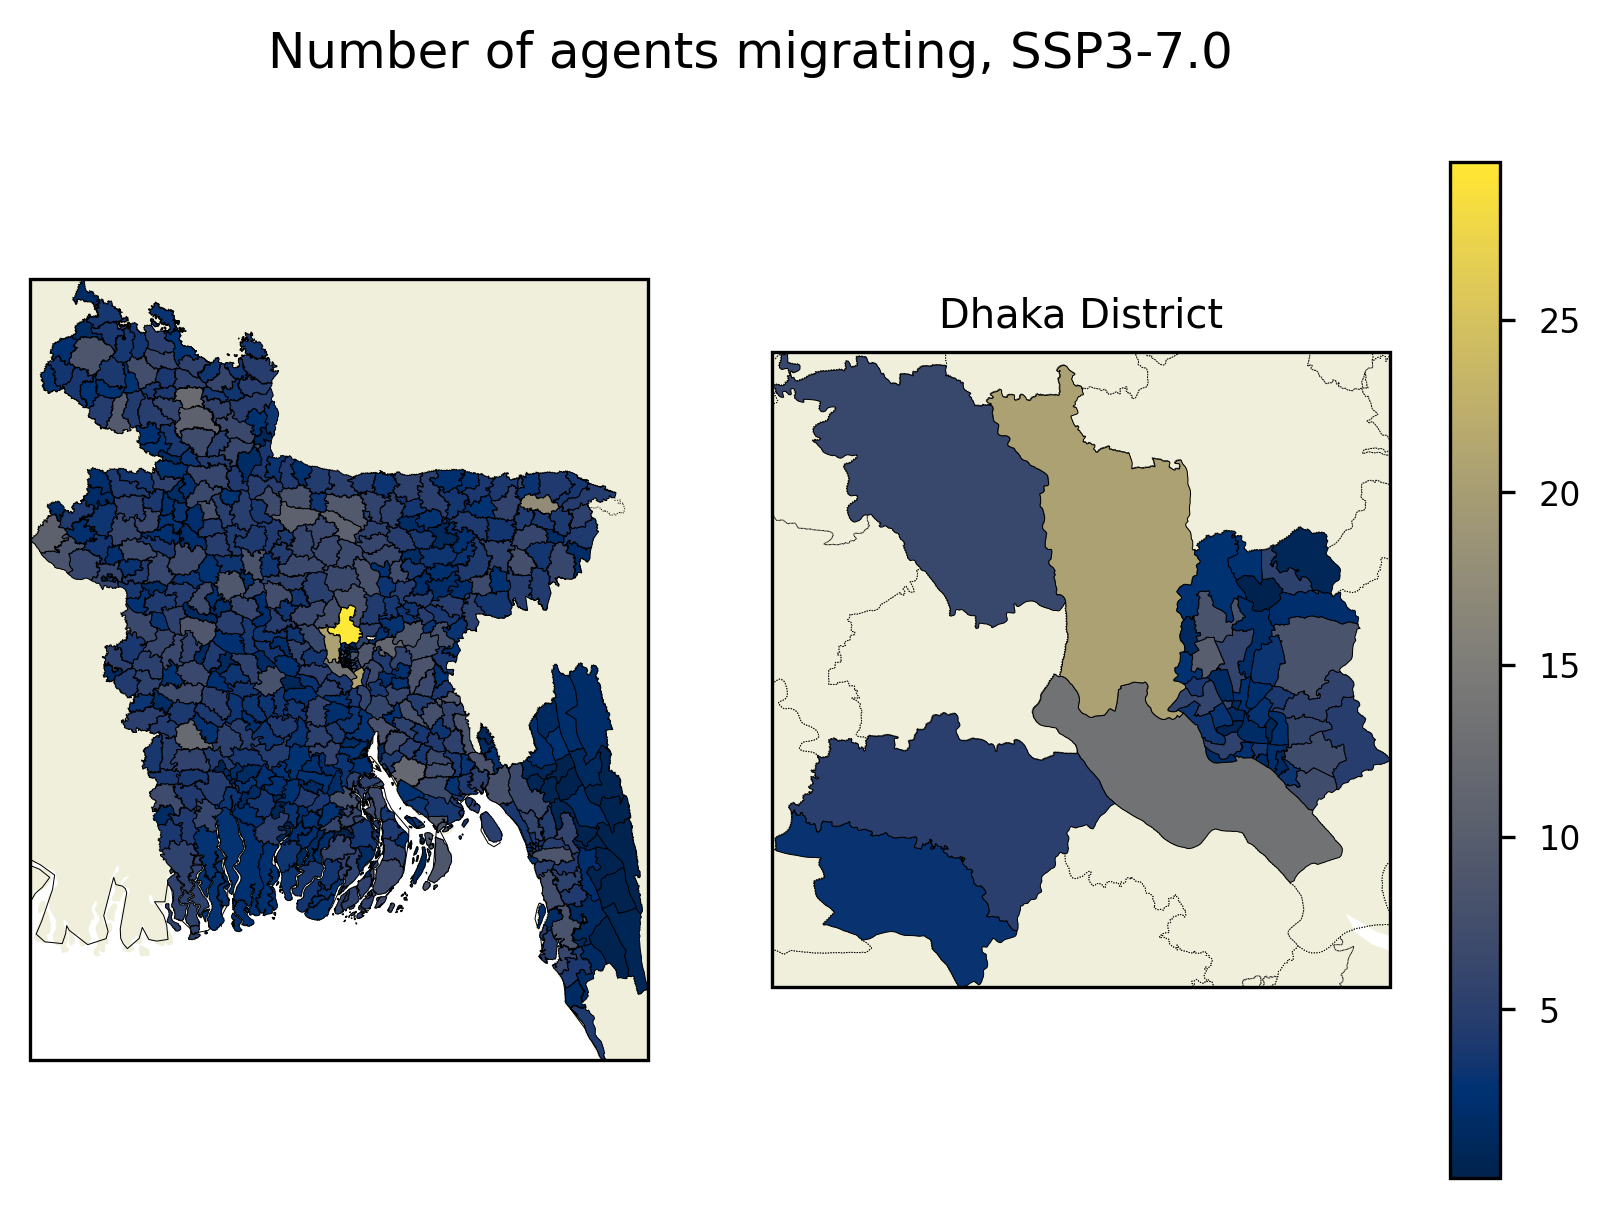

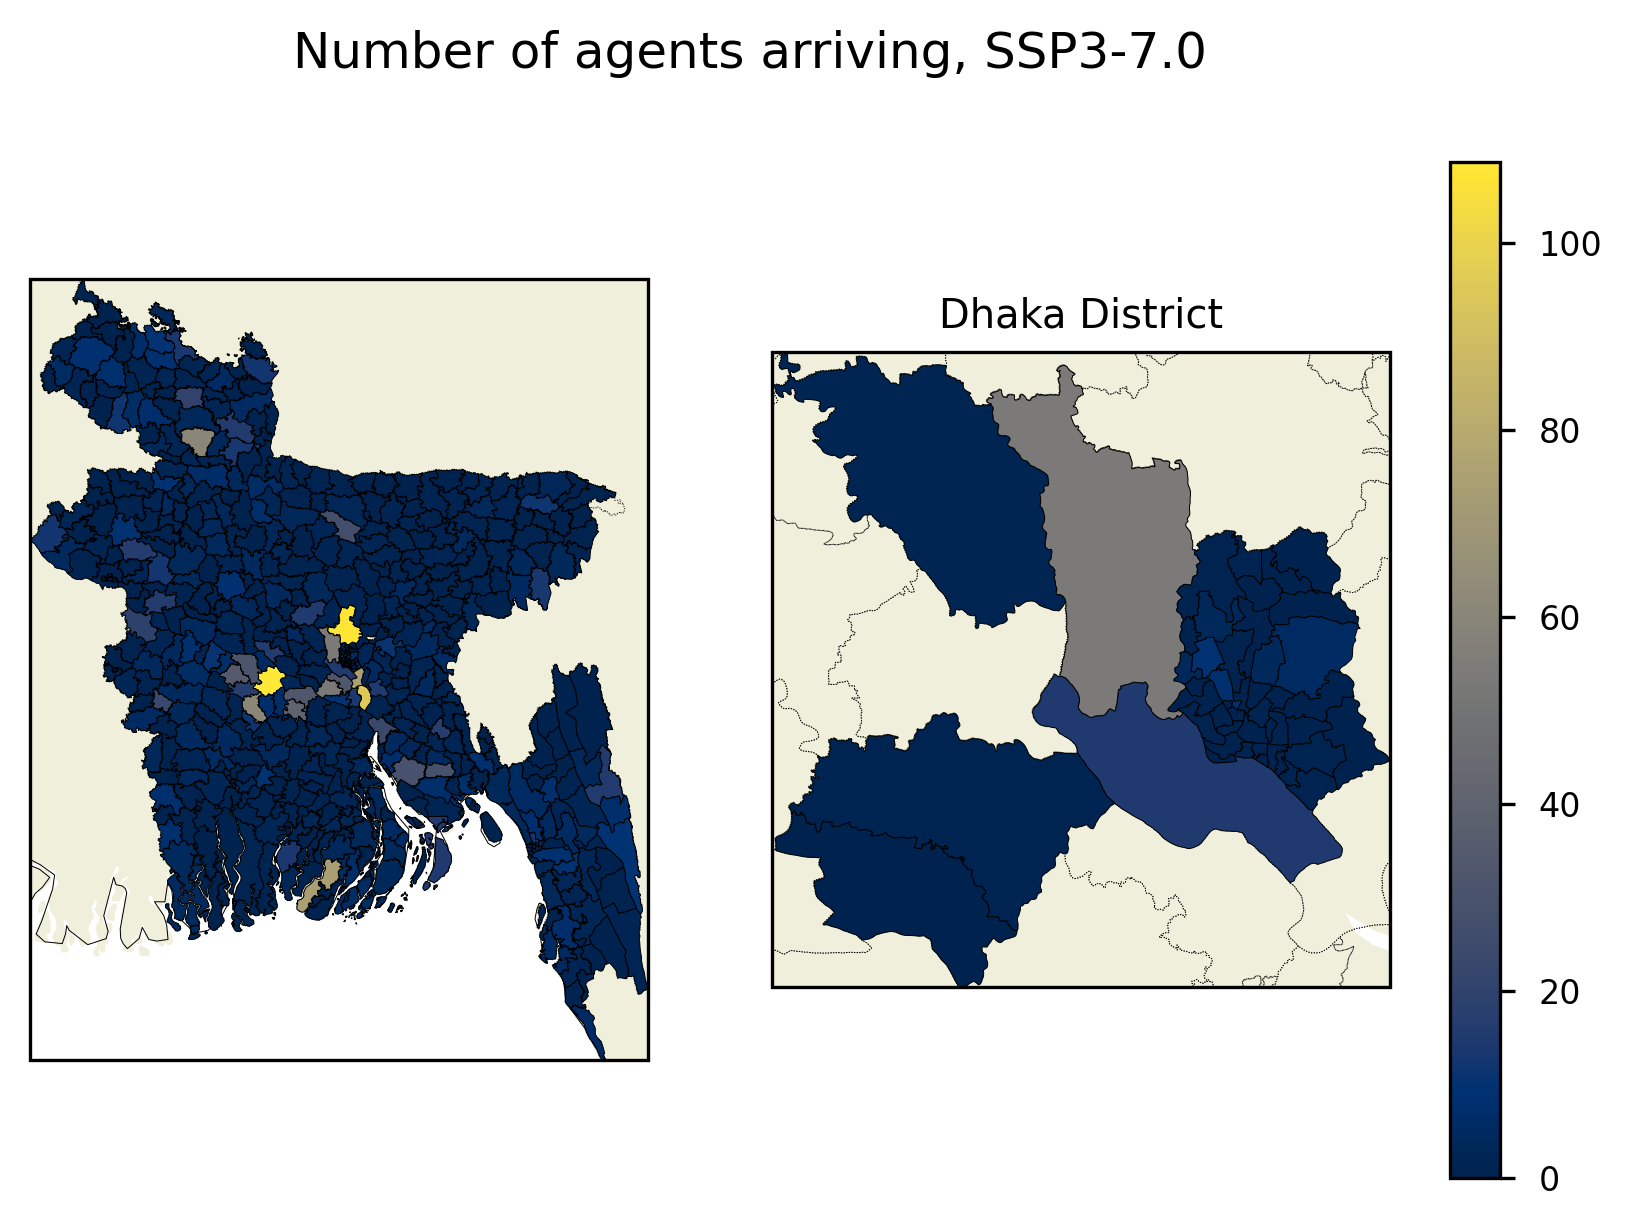

In [27]:
#SSPs=[119,126,245,370,585]
#SSPs_styled=['1-1.9','1-2.6','2-4.5','3-7.0','5-8.5']
#for x in range(len(SSPs)):
#     create_maps(df='averaged_zones_SSP_'+str(SSPs[x])+'.xlsx',senario=SSPs[x],for_title=SSPs_styled[x])

create_maps(df='averaged_zones_SSP_'+str(370)+'.xlsx',senario=370,for_title='3-7.0')

In [30]:
def population_change_maps(df='averaged_zones_SSP_119.xlsx',senario=119,for_title='1-1.9'):
    import matplotlib.pyplot as plt
    import geopandas as gpd
    import numpy as np
    from matplotlib.colors import Normalize
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.feature import ShapelyFeature
    from cartopy.io.shapereader import Reader
    import pandas as pd

    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = 300

    plt.style.use('seaborn-v0_8-paper')

    bgd_shapefile_path = r"C:\Users\orlaj\.local\share\cartopy\shapefiles\natural_earth\cultural\gadm41_BGD_3.shp" #r"C:\Users\orlaj\.local\share\cartopy\shapefiles\natural_earth\cultural\bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm2_bbs_20201113.shp"#
    gdf = gpd.read_file(bgd_shapefile_path)
    bgd_feature = ShapelyFeature(Reader(bgd_shapefile_path).geometries(), ccrs.PlateCarree(), edgecolor='black', facecolor='none',linestyle=':')
    gdf=gdf.drop(209)
    gdf=gdf.sort_values(by='CC_3')

    df_census=pd.read_excel(r"C:\Users\orlaj\OneDrive - Universiteit Utrecht\Thesis\Data\Bangladesh cencus Data\census_2011_with_common_crops.xlsx")
    df_census.index=df_census.Code
    df_census=df_census.drop('Code',axis=1)

    population_change=[]
    IDs=[]

    excel_data=pd.read_excel(df, sheet_name=None)
    for ID, df in excel_data.items():
        population_change.append((df['arrivals'].iloc[-1]-df['migrations'].iloc[-1]))#/(df_census.loc[int(ID),'Total']/10000))
        IDs.append(int(ID))
        
    cmap = plt.cm.RdYlGn_r
    min_value = np.min(population_change)
    max_value = np.max(population_change)
    norm = Normalize(vmin=min_value, vmax=max_value)

    fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()})

    ax[0].coastlines(resolution='50m')
    ax[0].add_feature(cfeature.LAND)
    ax[0].add_feature(bgd_feature)

    min_lon = np.inf
    max_lon = -np.inf
    min_lat = np.inf
    max_lat = -np.inf

    for (idx, (index, row)) in enumerate(gdf.iterrows()):
        region_id = int(row['CC_3'])
        if region_id in IDs:
            color = cmap(norm(population_change[idx]))
            ax[0].add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=color, edgecolor='black')

            min_lon = min(min_lon, row['geometry'].bounds[0])
            max_lon = max(max_lon, row['geometry'].bounds[2])
            min_lat = min(min_lat, row['geometry'].bounds[1])
            max_lat = max(max_lat, row['geometry'].bounds[3])

            ax[0].set_extent([min_lon, max_lon, min_lat, max_lat])

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 
#     plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    fig.suptitle('Population increase due to migration, SSP'+for_title)
            #plt.subplots_adjust(right=0.85)
#     plt.savefig('SSP_'+str(senario)+'_pop_change.jpg')
#     plt.show()
    
#     fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    ax[1].coastlines(resolution='50m')
    ax[1].add_feature(cfeature.LAND)
    ax[1].add_feature(bgd_feature)
    
    min_lon = np.inf
    max_lon = -np.inf
    min_lat = np.inf
    max_lat = -np.inf

    for (idx, (index, row)) in enumerate(gdf.iterrows()):
        region_id = int(row['CC_3'])
        if region_id in IDs and 302600<= region_id <302700:
            color = cmap(norm(population_change[idx]))
            ax[1].add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=color, edgecolor='black')

            min_lon = min(min_lon, row['geometry'].bounds[0])
            max_lon = max(max_lon, row['geometry'].bounds[2])
            min_lat = min(min_lat, row['geometry'].bounds[1])
            max_lat = max(max_lat, row['geometry'].bounds[3])

            ax[1].set_extent([min_lon, max_lon, min_lat, max_lat])

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 
    plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.05,label='number of agents')
    ax[1].set_title('Dhaka District')
    plt.savefig('SSP_'+str(senario)+'_pop_change.jpg')
    plt.show()

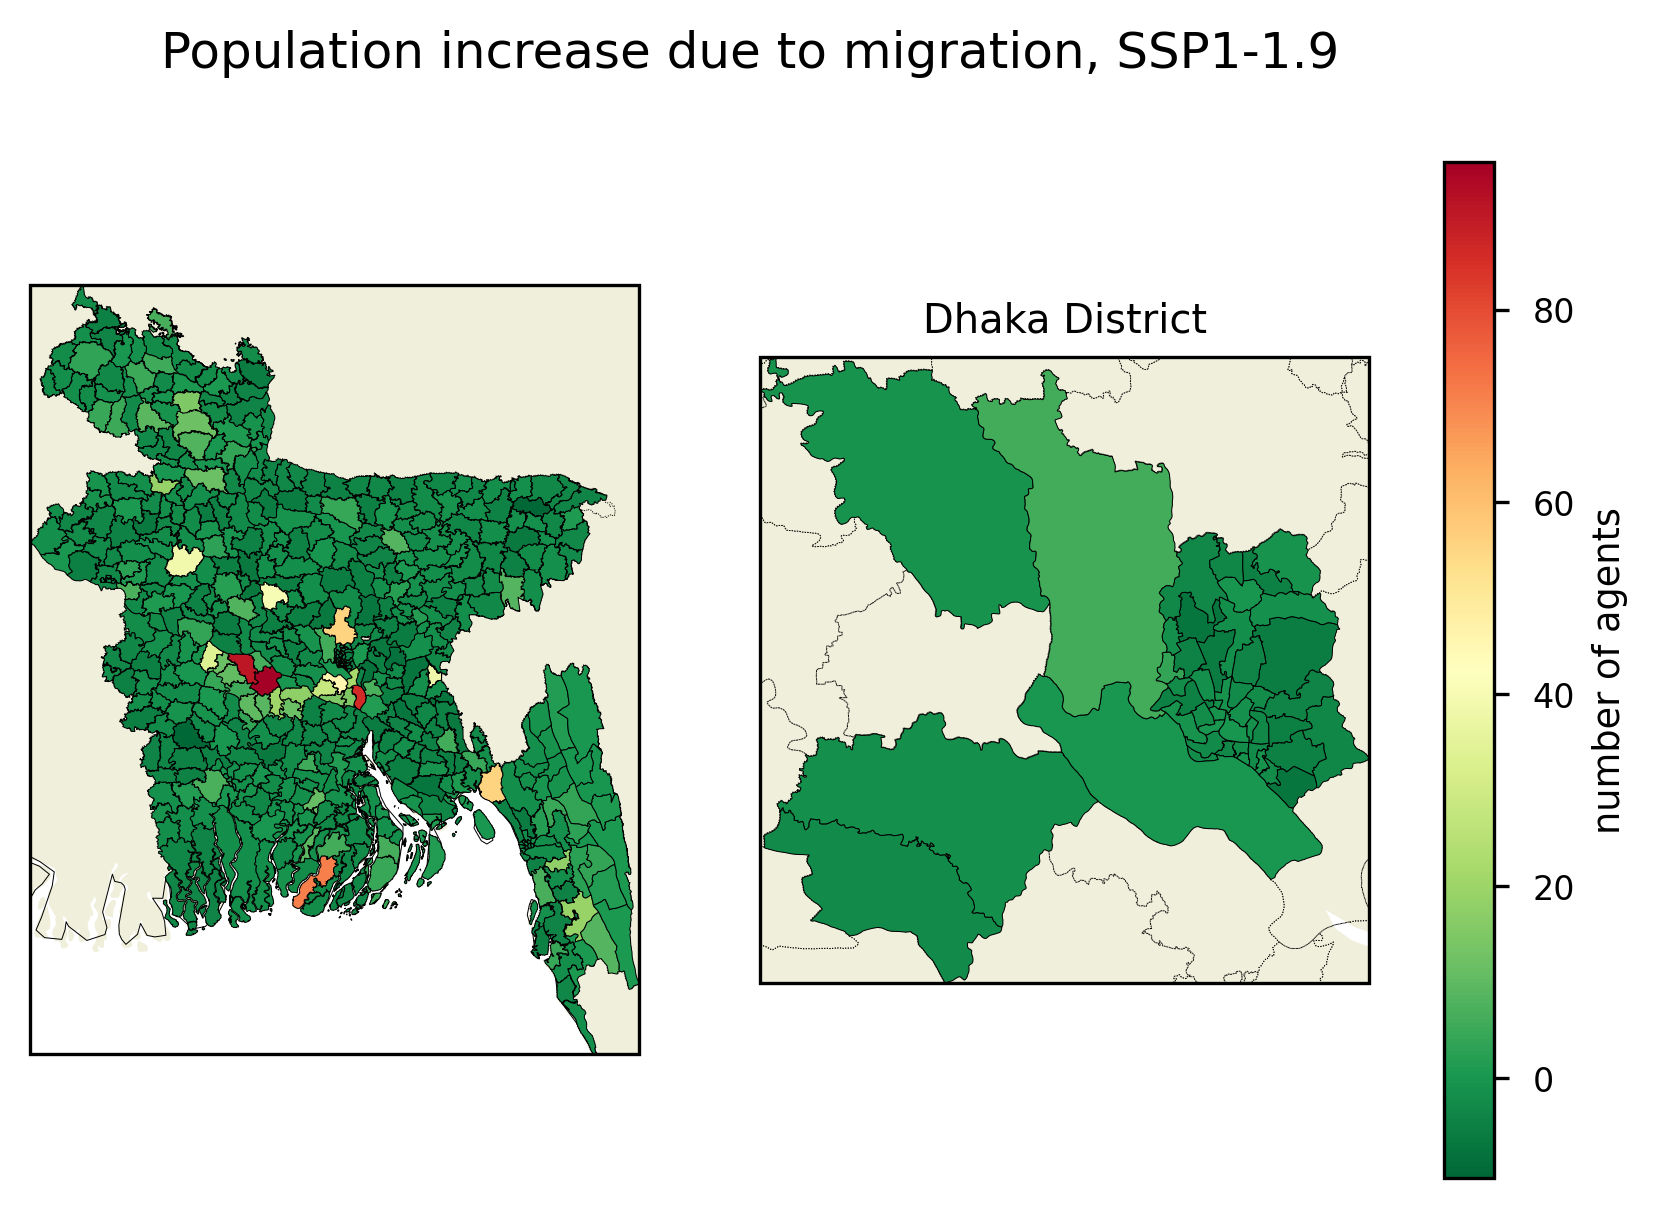

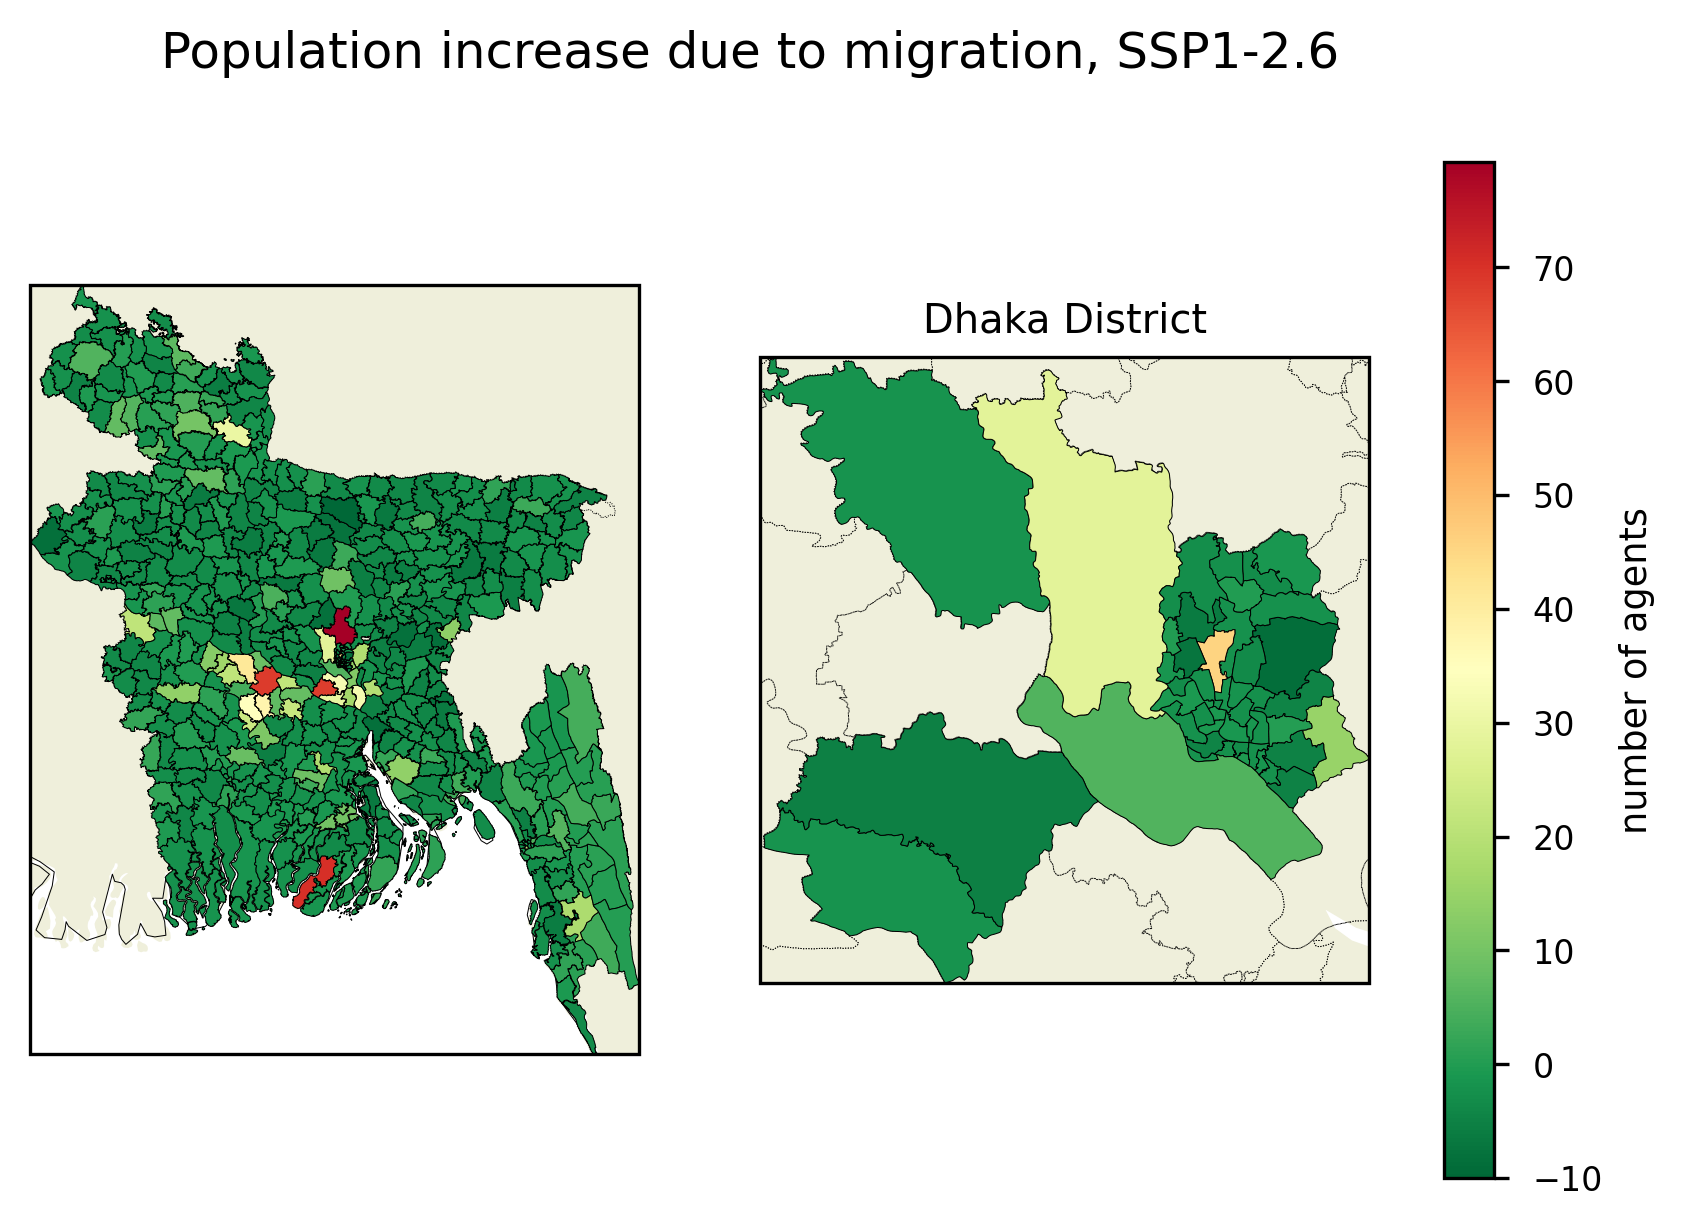

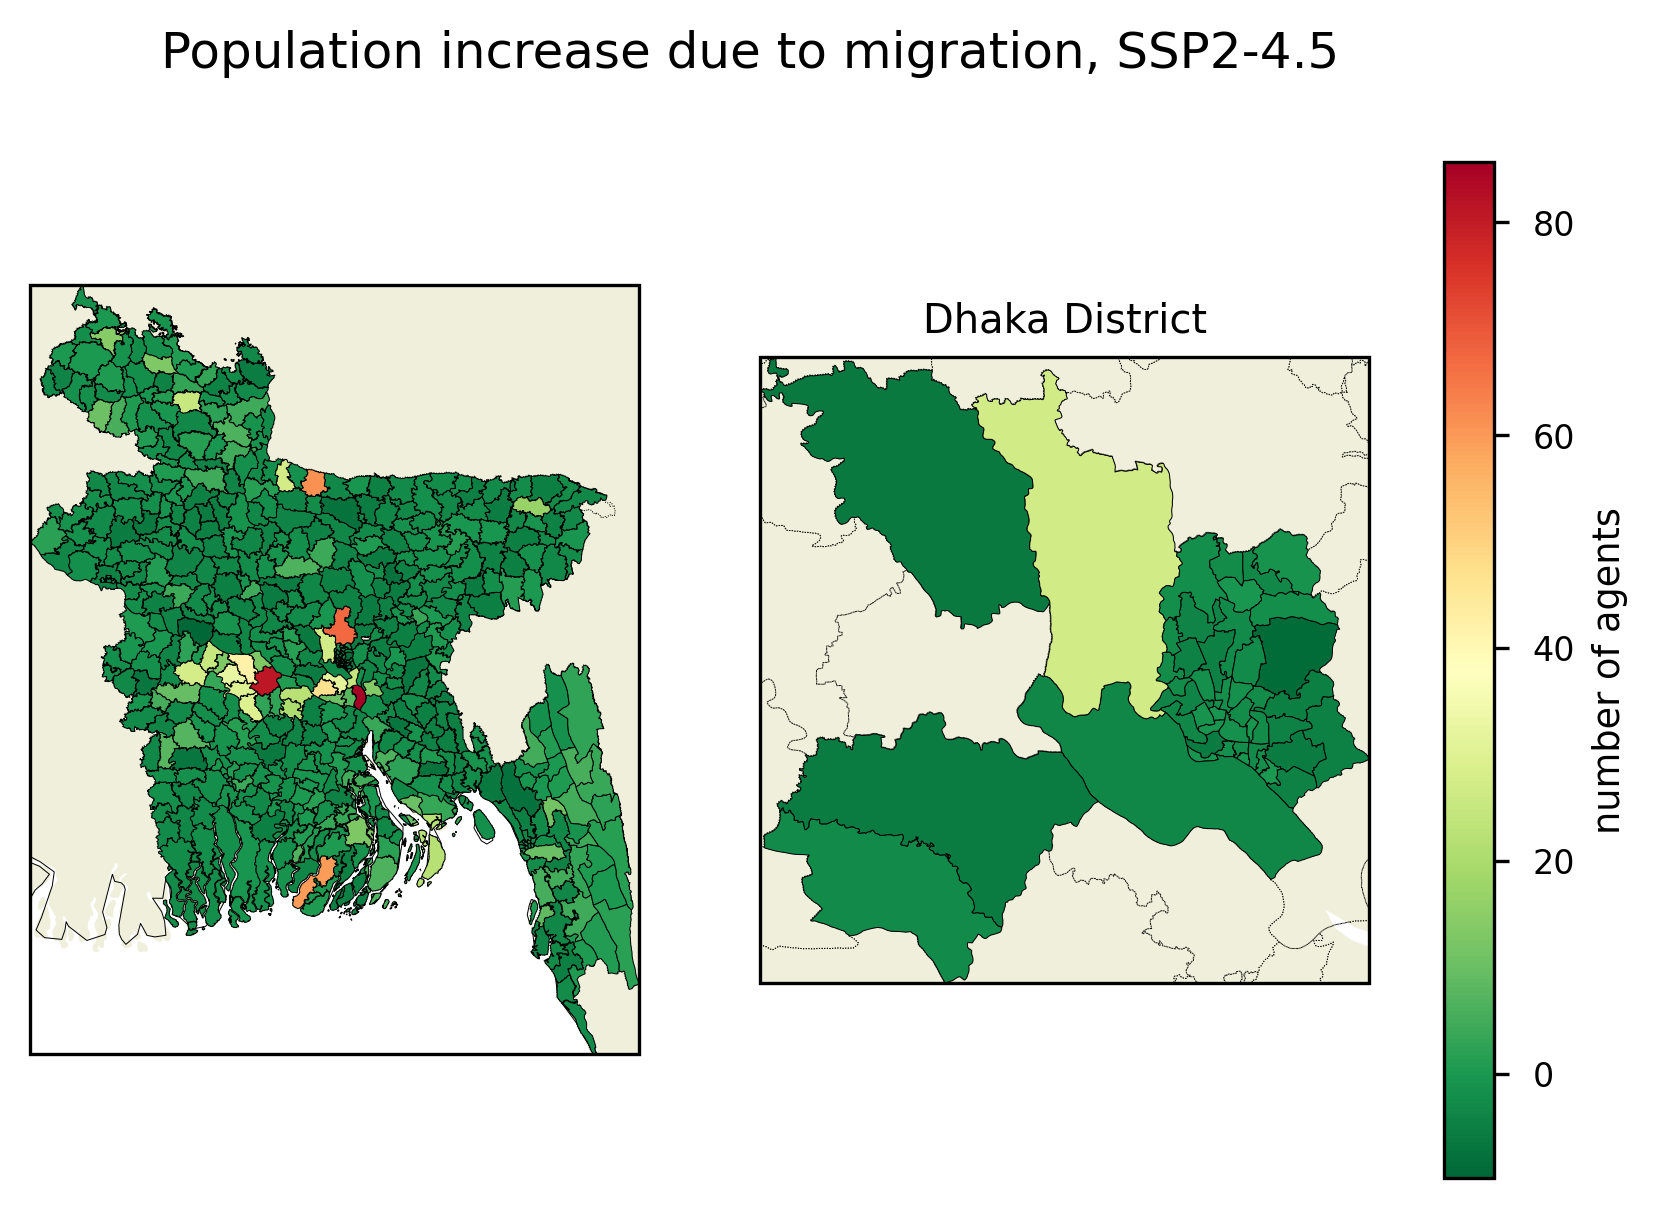

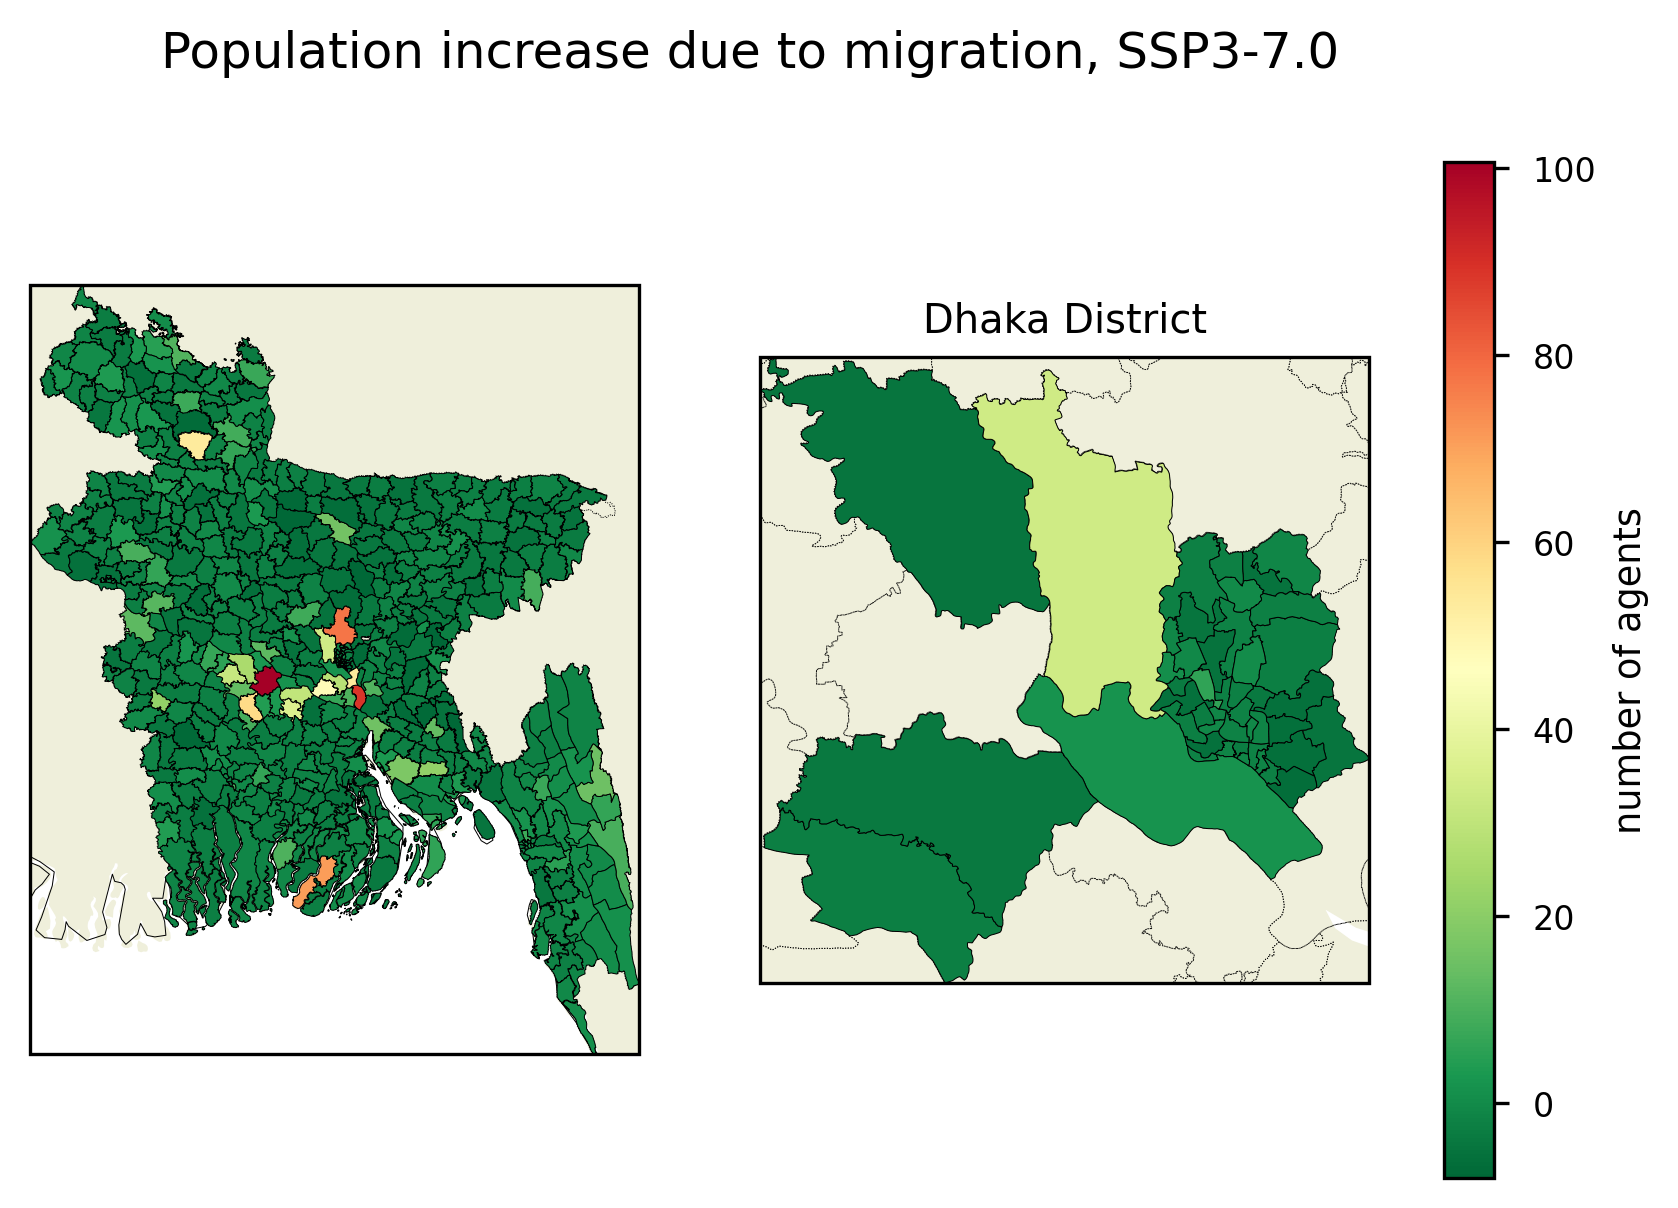

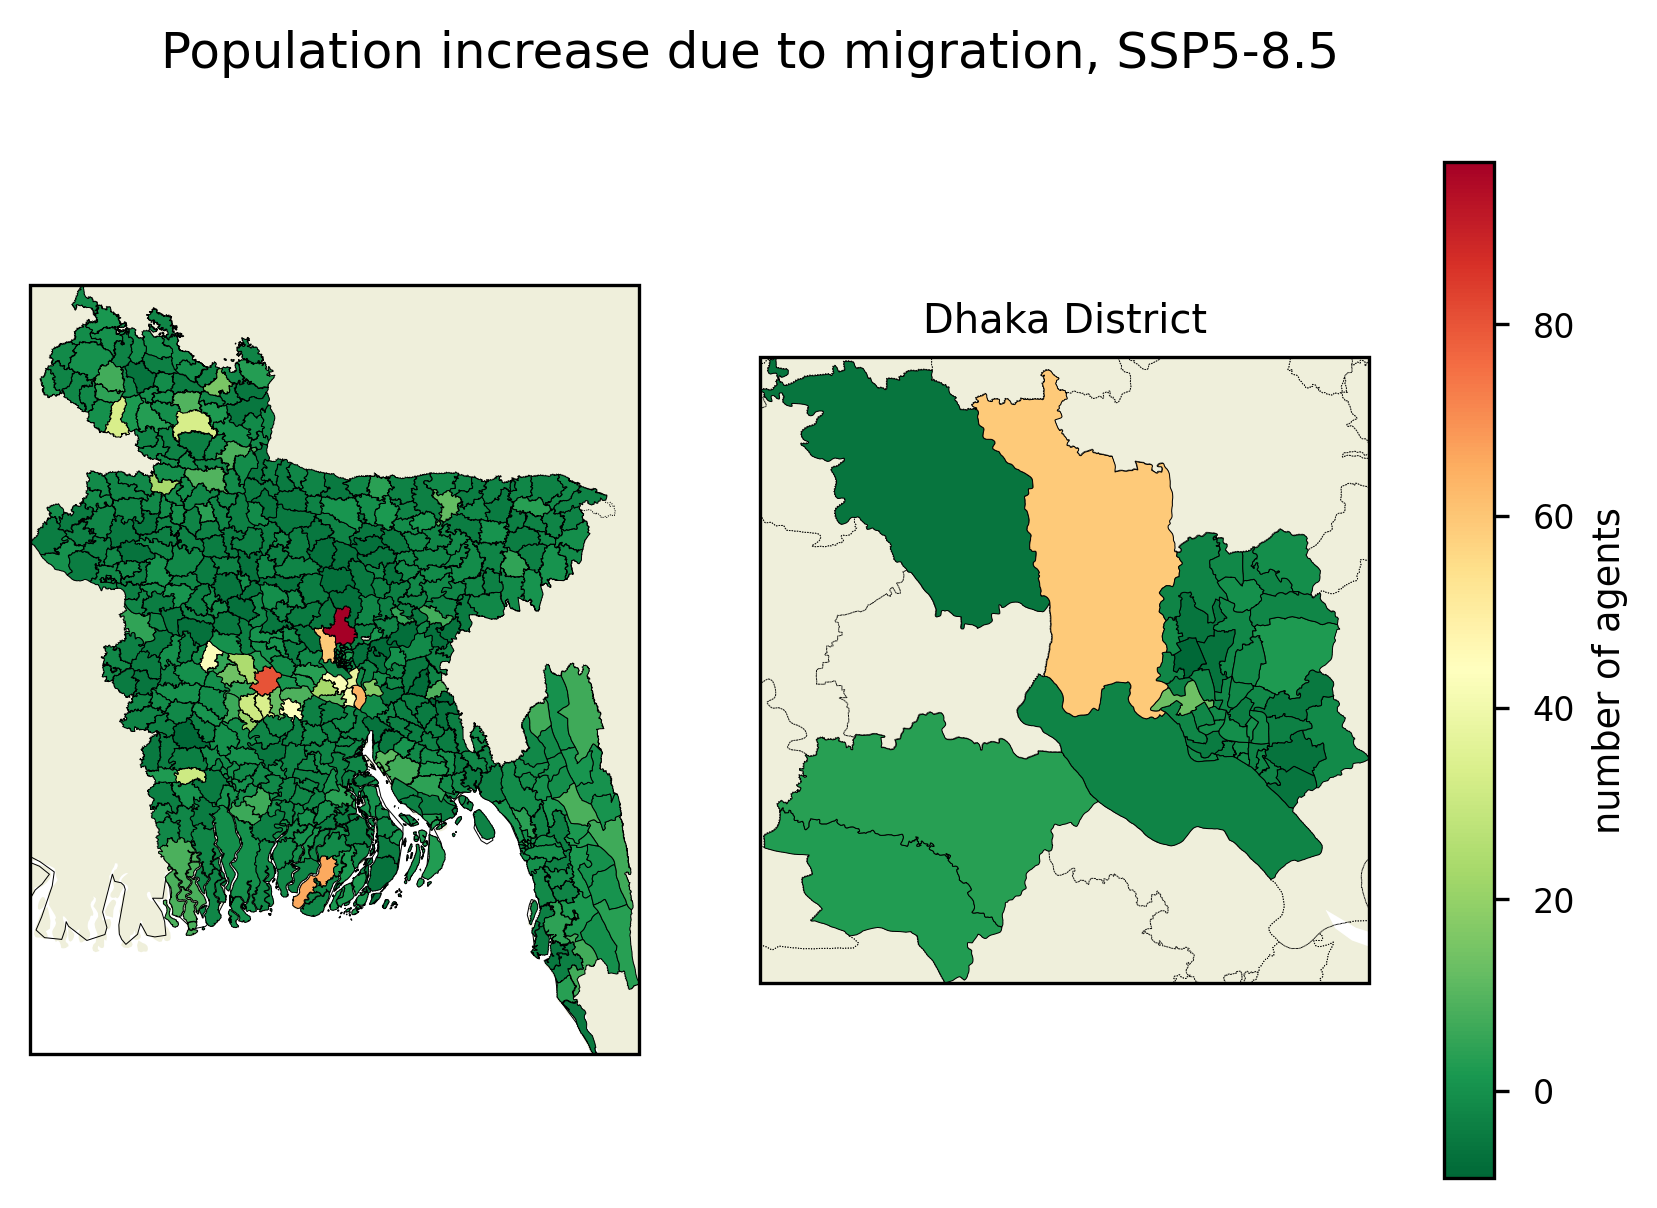

In [31]:
SSPs=[119,126,245,370,585]
SSPs_styled=['1-1.9','1-2.6','2-4.5','3-7.0','5-8.5']

for x in range(len(SSPs)):
    population_change_maps(df='averaged_zones_SSP_'+str(SSPs[x])+'.xlsx',senario=SSPs[x],for_title=SSPs_styled[x])

In [24]:
def create_maps_percent(df='averaged_zones_SSP_119.xlsx',senario=119,for_title='1-1.9'):
    import matplotlib.pyplot as plt
    import geopandas as gpd
    import numpy as np
    from matplotlib.colors import Normalize
    import cartopy.crs as ccrs
    import cartopy.feature as cfeature
    from cartopy.feature import ShapelyFeature
    from cartopy.io.shapereader import Reader
    import pandas as pd

    import matplotlib as mpl
    mpl.rcParams['figure.dpi'] = 300

    plt.style.use('seaborn-v0_8-colorblind')

    bgd_shapefile_path = r"C:\Users\orlaj\.local\share\cartopy\shapefiles\natural_earth\cultural\gadm41_BGD_3.shp" #r"C:\Users\orlaj\.local\share\cartopy\shapefiles\natural_earth\cultural\bgd_adm_bbs_20201113_SHP/bgd_admbnda_adm2_bbs_20201113.shp"#
    gdf = gpd.read_file(bgd_shapefile_path)
    bgd_feature = ShapelyFeature(Reader(bgd_shapefile_path).geometries(), ccrs.PlateCarree(), edgecolor='black', facecolor='none',linestyle=':')
    gdf=gdf.drop(209)
    gdf=gdf.sort_values(by='CC_3')

    df_census=pd.read_excel(r"C:\Users\orlaj\OneDrive - Universiteit Utrecht\Thesis\Data\Bangladesh cencus Data\census_2011_with_common_crops.xlsx")
    df_census.index=df_census.Code
    df_census=df_census.drop('Code',axis=1)

    migrations=[]
    arrivals=[]
    IDs=[]

    excel_data=pd.read_excel(df, sheet_name=None)
    for ID, df in excel_data.items():
        migrations.append(df['migrations'].iloc[-1]/(df_census.loc[int(ID),'Total']/10000))
        arrivals.append(df['arrivals'].iloc[-1]/(df_census.loc[int(ID),'Total']/10000))
        IDs.append(int(ID))
        
    cmap = plt.cm.cividis
    min_value = np.min(migrations)
    max_value = np.max(migrations)
    norm = Normalize(vmin=min_value, vmax=max_value)

#     fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})
    fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()})

    ax[0].coastlines(resolution='50m')
    ax[0].add_feature(cfeature.LAND)
    ax[0].add_feature(bgd_feature)

    min_lon = np.inf
    max_lon = -np.inf
    min_lat = np.inf
    max_lat = -np.inf

    for (idx, (index, row)) in enumerate(gdf.iterrows()):
        region_id = int(row['CC_3'])
        if region_id in IDs:
            color = cmap(norm(migrations[idx]))
            ax[0].add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=color, edgecolor='black')

            min_lon = min(min_lon, row['geometry'].bounds[0])
            max_lon = max(max_lon, row['geometry'].bounds[2])
            min_lat = min(min_lat, row['geometry'].bounds[1])
            max_lat = max(max_lat, row['geometry'].bounds[3])

            ax[0].set_extent([min_lon, max_lon, min_lat, max_lat])

#     sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#     sm.set_array([]) 
#     plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    fig.suptitle('Percetage of agents migrating, SSP'+for_title)
            #plt.subplots_adjust(right=0.85)
# #     plt.savefig('SSP_'+str(senario)+'_migration_map.jpg')
#     plt.show()
    
#     fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    ax[1].coastlines(resolution='50m')
    ax[1].add_feature(cfeature.LAND)
    ax[1].add_feature(bgd_feature)

    min_lon = np.inf
    max_lon = -np.inf
    min_lat = np.inf
    max_lat = -np.inf

    for (idx, (index, row)) in enumerate(gdf.iterrows()):
        region_id = int(row['CC_3'])
        if region_id in IDs and 302600<= region_id <302700:
            color = cmap(norm(migrations[idx]))
            ax[1].add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=color, edgecolor='black')

            min_lon = min(min_lon, row['geometry'].bounds[0])
            max_lon = max(max_lon, row['geometry'].bounds[2])
            min_lat = min(min_lat, row['geometry'].bounds[1])
            max_lat = max(max_lat, row['geometry'].bounds[3])

            ax[1].set_extent([min_lon, max_lon, min_lat, max_lat])

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 
    plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04,label='percentage migrating')
    ax[1].set_title('Dhaka District')
            #plt.subplots_adjust(right=0.85)
#     plt.savefig('SSP_'+str(senario)+'_migration_map_Dhaka.jpg')
    plt.savefig('SSP_'+str(senario)+'_percetage_migration_map.jpg')
    plt.show()
    
    cmap = plt.cm.cividis
    min_value = np.min(arrivals)
    max_value = np.max(arrivals)
    norm = Normalize(vmin=min_value, vmax=max_value)
    
    fig, ax = plt.subplots(nrows=1, ncols=2, subplot_kw={'projection': ccrs.PlateCarree()})

    ax[0].coastlines(resolution='50m')
    ax[0].add_feature(cfeature.LAND)
    ax[0].add_feature(bgd_feature)

    cmap = plt.cm.cividis
    min_value = np.min(arrivals)
    max_value = np.max(arrivals)
    norm = Normalize(vmin=min_value, vmax=max_value)

    min_lon = np.inf
    max_lon = -np.inf
    min_lat = np.inf
    max_lat = -np.inf

    for (idx, (index, row)) in enumerate(gdf.iterrows()):
        region_id = int(row['CC_3'])
        if region_id in IDs:
            color = cmap(norm(arrivals[idx]))
            ax[0].add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=color, edgecolor='black')

            min_lon = min(min_lon, row['geometry'].bounds[0])
            max_lon = max(max_lon, row['geometry'].bounds[2])
            min_lat = min(min_lat, row['geometry'].bounds[1])
            max_lat = max(max_lat, row['geometry'].bounds[3])

            ax[0].set_extent([min_lon, max_lon, min_lat, max_lat])

#     sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
#     sm.set_array([]) 
#     plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.05, pad=0.05)
    
#     plt.savefig('SSP_'+str(senario)+'_arrival_map.jpg')
#     plt.show()
    
    
    
#     fig, ax = plt.subplots(subplot_kw={'projection': ccrs.PlateCarree()})

    ax[1].coastlines(resolution='50m')
    ax[1].add_feature(cfeature.LAND)
    ax[1].add_feature(bgd_feature)

    cmap = plt.cm.cividis
    min_value = np.min(arrivals)
    max_value = np.max(arrivals)
    norm = Normalize(vmin=min_value, vmax=max_value)

    min_lon = np.inf
    max_lon = -np.inf
    min_lat = np.inf
    max_lat = -np.inf

    for (idx, (index, row)) in enumerate(gdf.iterrows()):
        region_id = int(row['CC_3'])
        if region_id in IDs and 302600<= region_id <302700:
            color = cmap(norm(arrivals[idx]))
            ax[1].add_geometries([row['geometry']], ccrs.PlateCarree(), facecolor=color, edgecolor='black')

            min_lon = min(min_lon, row['geometry'].bounds[0])
            max_lon = max(max_lon, row['geometry'].bounds[2])
            min_lat = min(min_lat, row['geometry'].bounds[1])
            max_lat = max(max_lat, row['geometry'].bounds[3])

            ax[1].set_extent([min_lon, max_lon, min_lat, max_lat])

    sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([]) 
    plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04,label='percentage arrivals')
    ax[1].set_title('Dhaka District')
    fig.suptitle('Agents arriving as a percentage of local population, SSP'+for_title)
    plt.savefig('SSP_'+str(senario)+'_percentage_arrival_map.jpg')
#     plt.savefig('SSP_'+str(senario)+'_arrival_map_dhaka.jpg')
    plt.show()

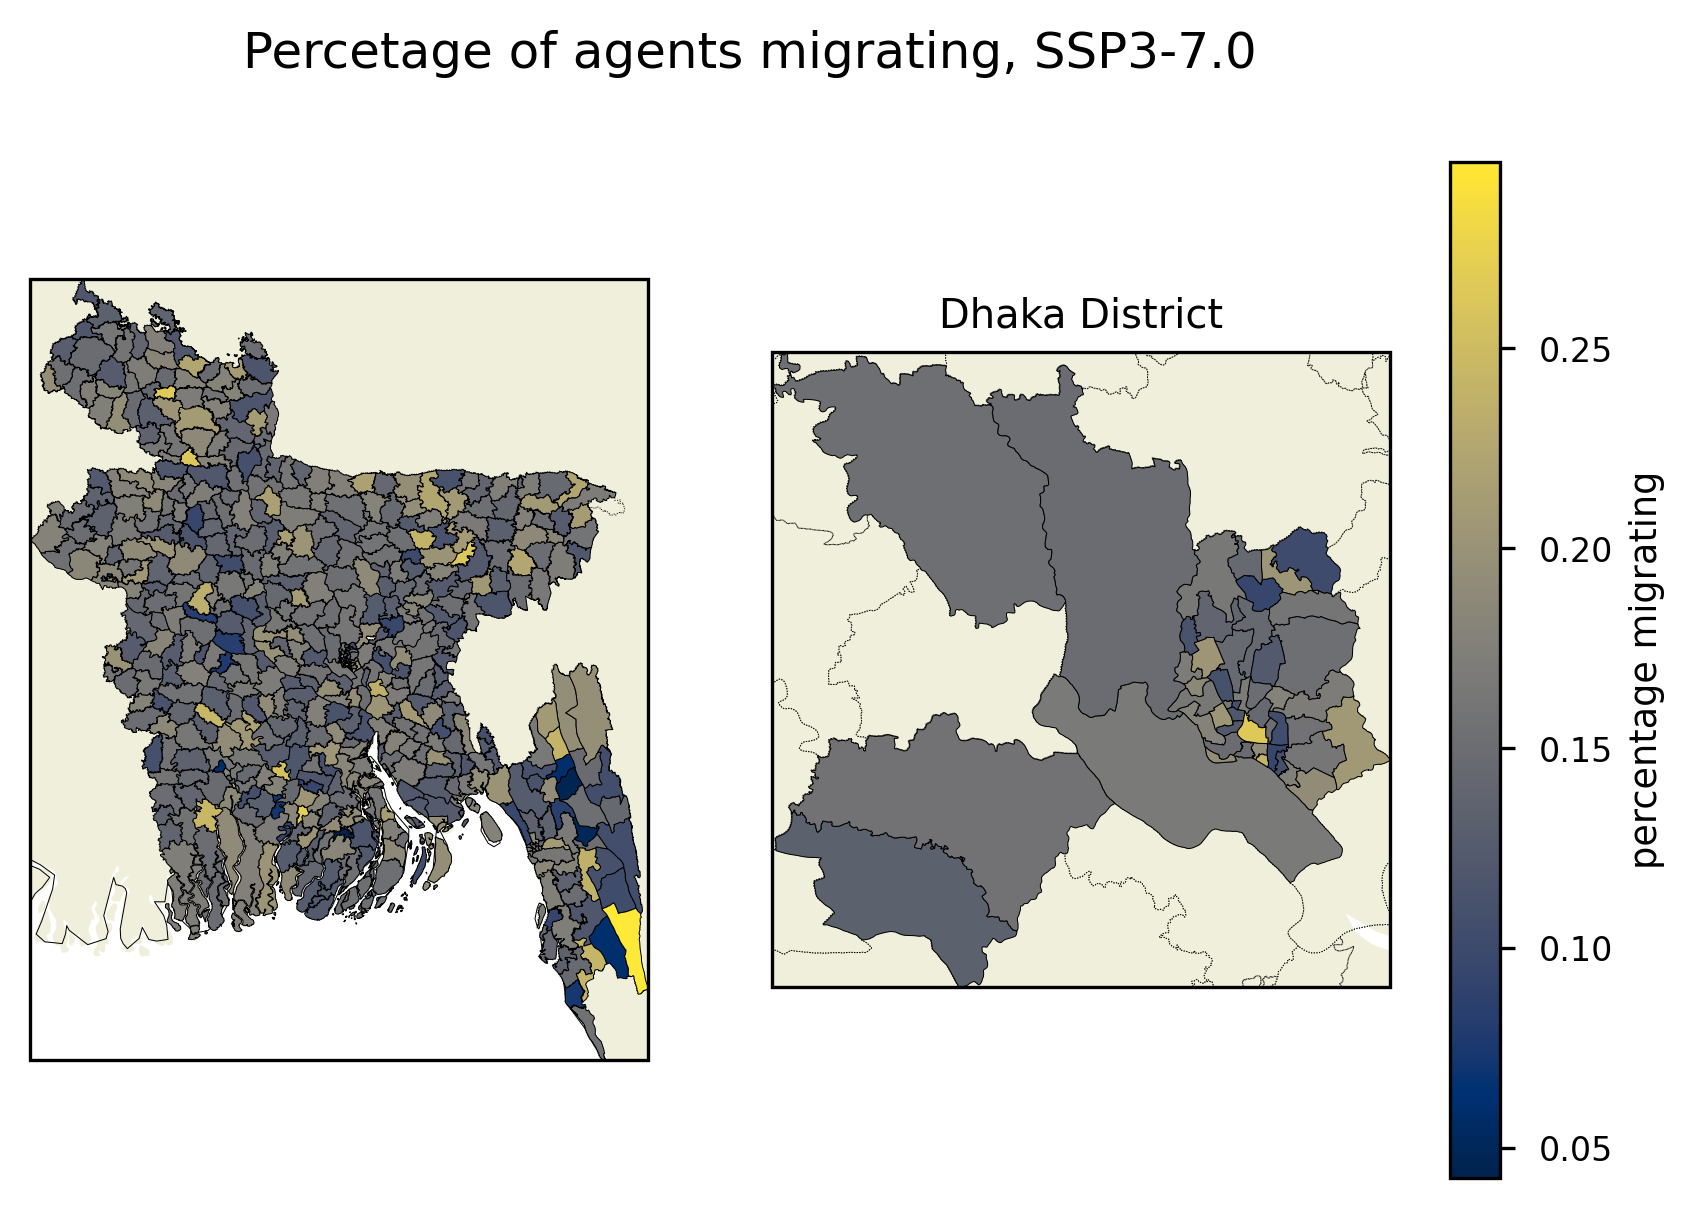

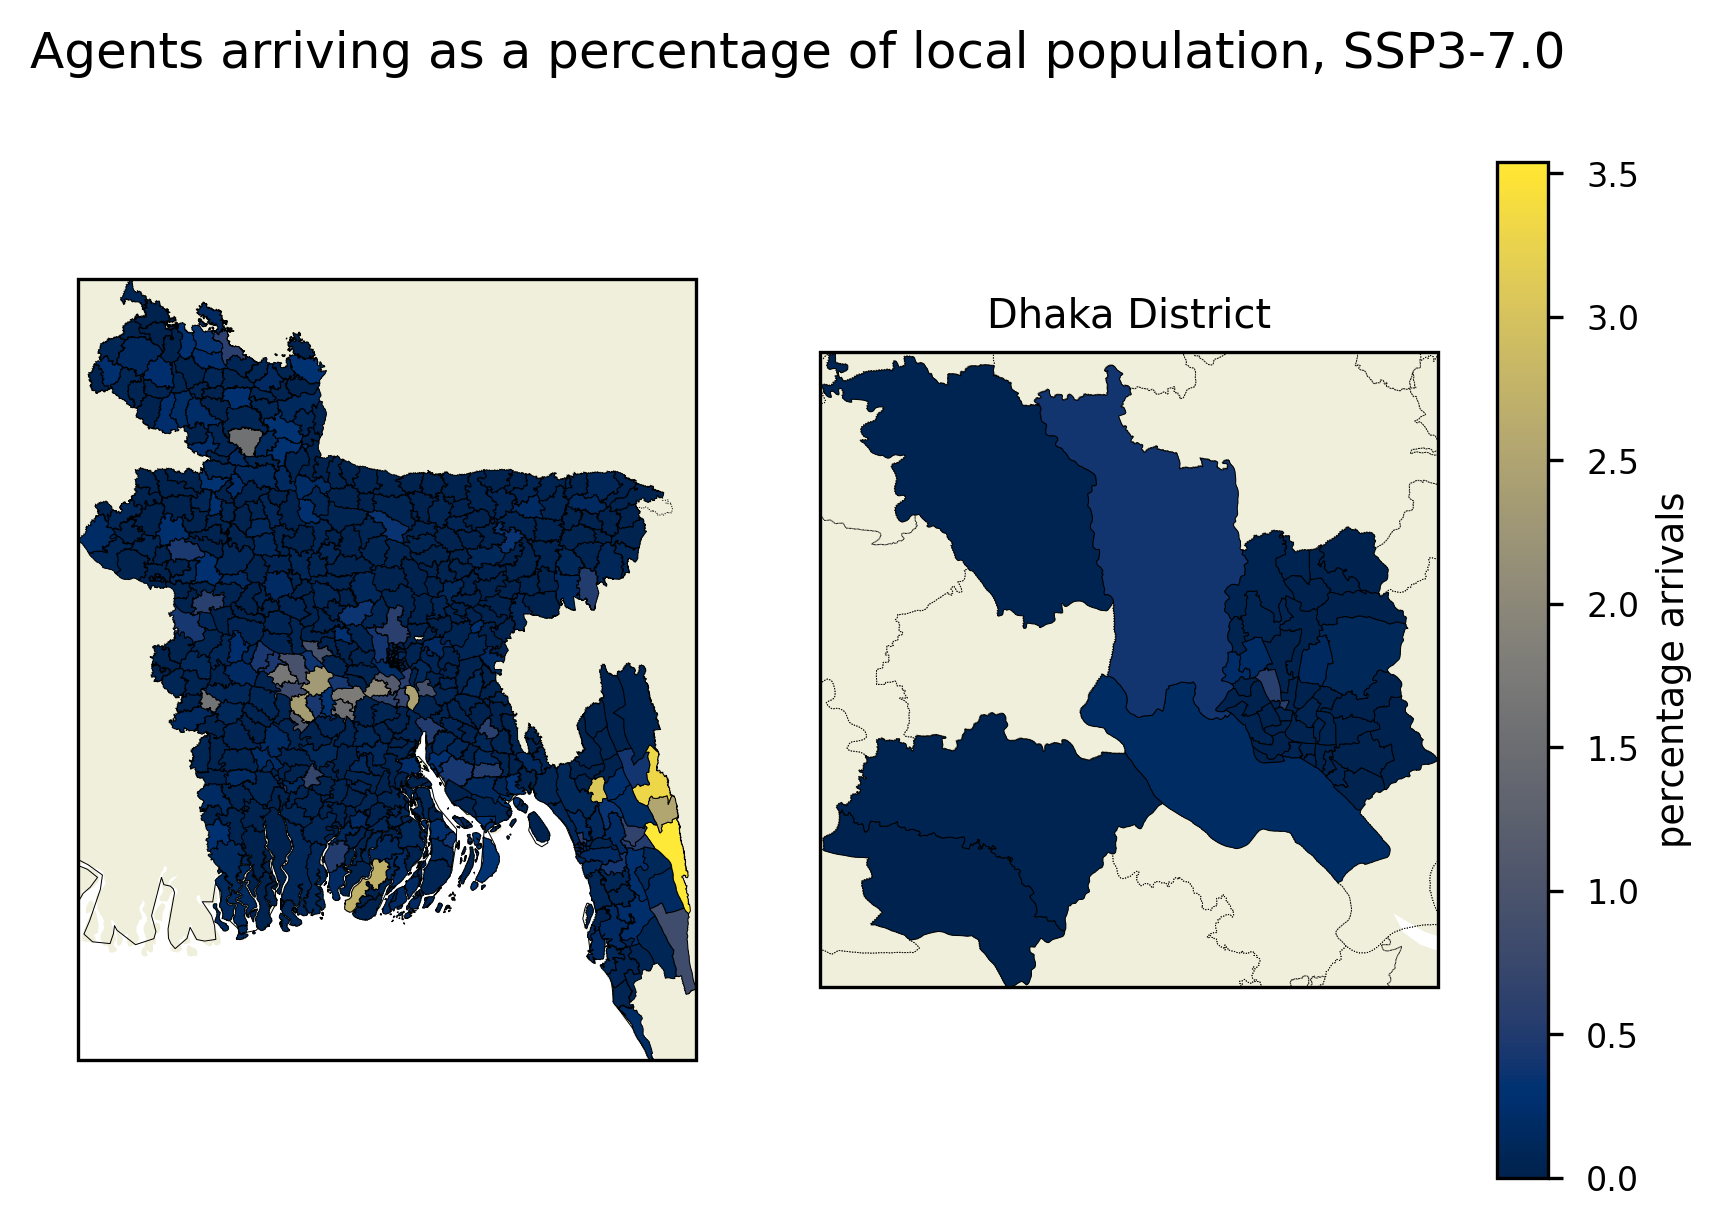

In [25]:
SSPs=[370]#[119,126,245,370,585]
SSPs_styled=['3-7.0']#['1-1.9','1-2.6','2-4.5','3-7.0','5-8.5']

for x in range(len(SSPs)):
    create_maps_percent(df='averaged_zones_SSP_'+str(SSPs[x])+'.xlsx',senario=SSPs[x],for_title=SSPs_styled[x])